<a href="https://colab.research.google.com/github/Albly/Deep_learning_MIMO_channel_denoise/blob/main/main_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Albly/Deep_learning_MIMO_channel_denoise.git
%cd Deep_learning_MIMO_channel_denoise
!pip install mat73 -q

%load_ext autoreload
%autoreload 2

Cloning into 'Deep_learning_MIMO_channel_denoise'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 25 (delta 7), reused 20 (delta 5), pack-reused 0
Receiving objects: 100% (25/25), 11.88 KiB | 282.00 KiB/s, done.
Resolving deltas: 100% (7/7), done.


In [7]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import glob
import scipy

from src.mat_dataset import MAT_Dataset
from torch.utils.data import DataLoader
from torchsummary import summary
from src.models import Beam_DnCNN_3D, train_model
import json

from src.metrics import complex_MSE

from google.colab import drive
drive.mount('/content/gdrive')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
file_path = '/content/gdrive/MyDrive/ChannelQriga_Freq_3kmh_Scena0_test_MIR_GIT_RAW_NR_BERLIN_UMa_NLOS_3p5GHz_seed_1002.mat'
train_dataset = MAT_Dataset(file_path, [0,1,2])
test_dataset = MAT_Dataset(file_path, [3])

batch_size = 2
train_loader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size = batch_size, shuffle = True)

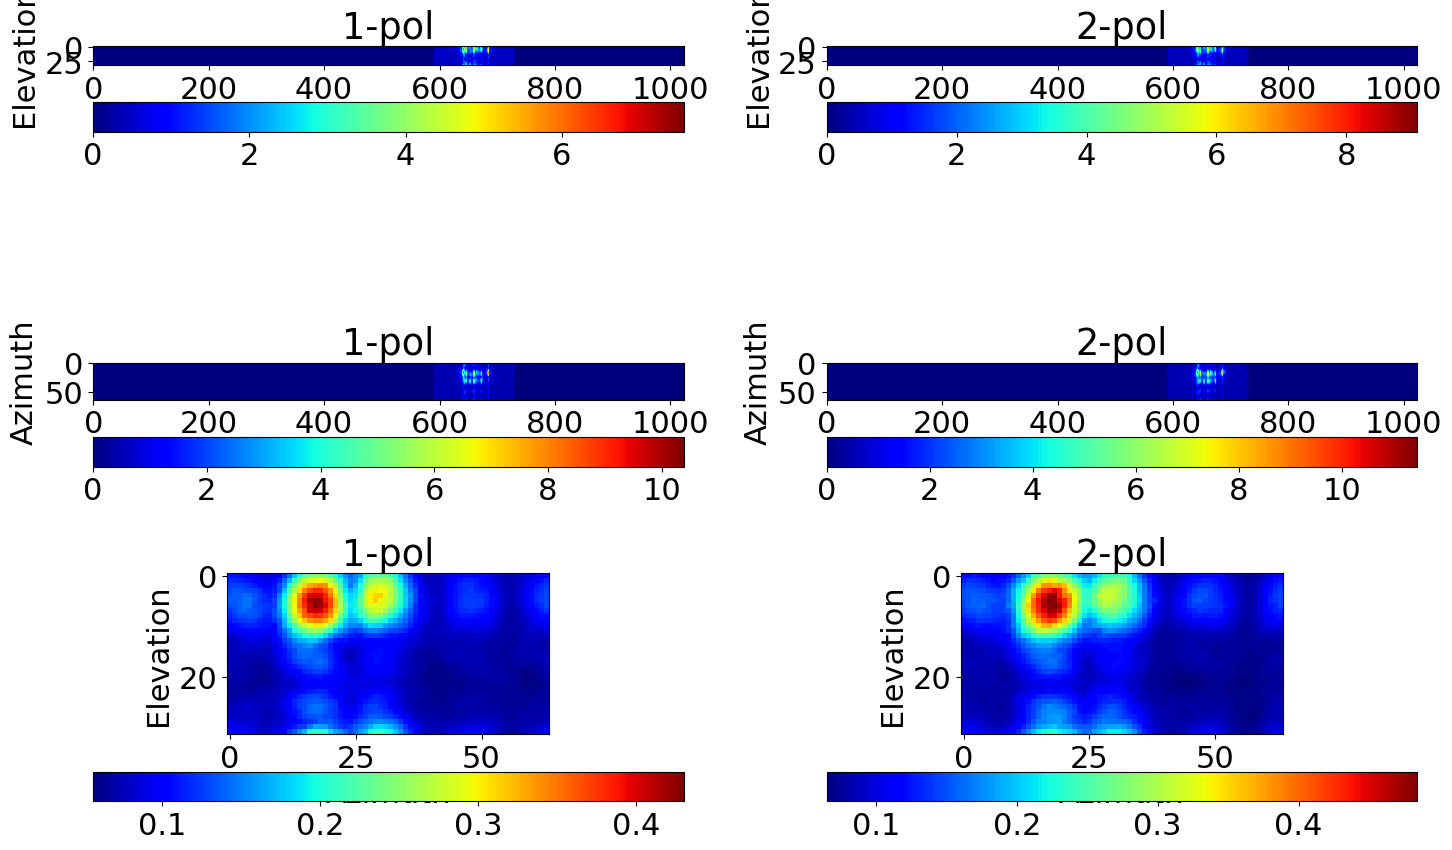

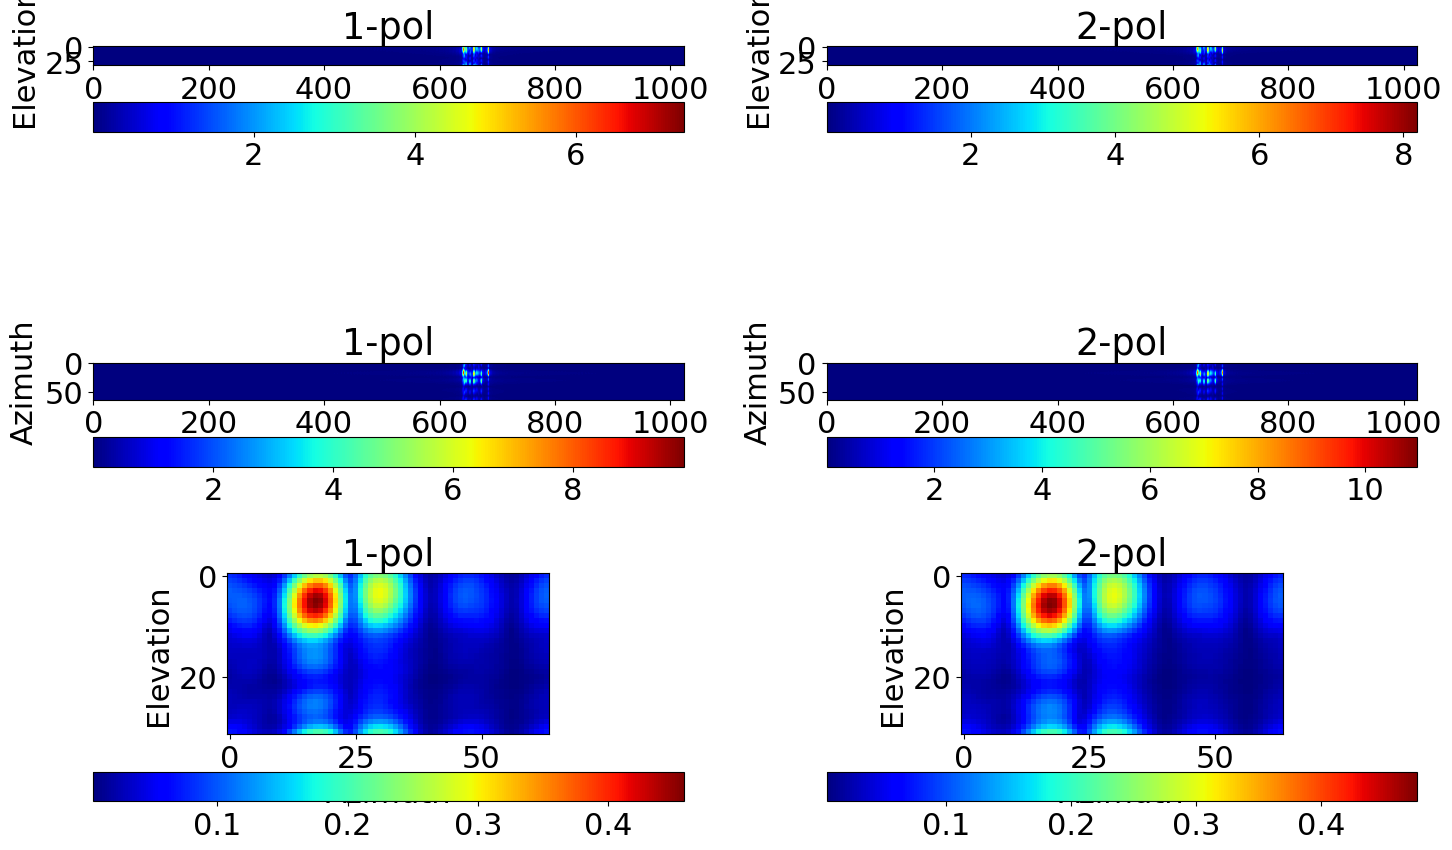

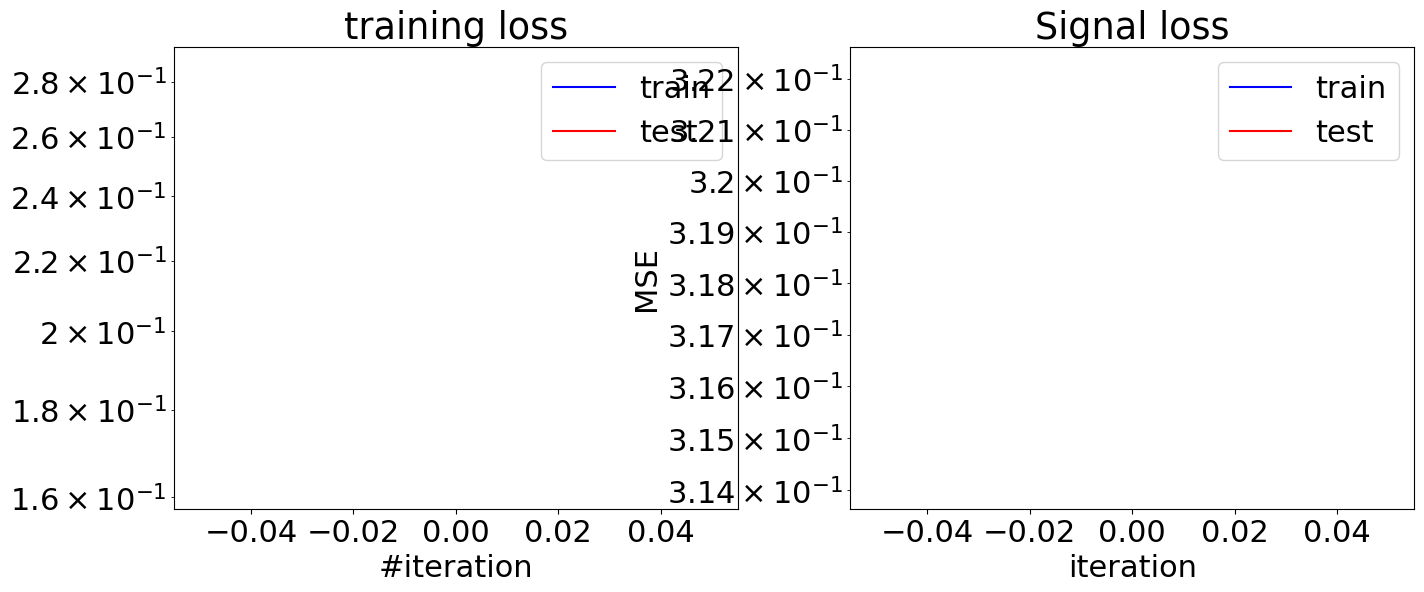

KeyboardInterrupt: ignored

In [19]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

#=======================================================================
cfg = json.load(open("model_config.txt"))
#=======================================================================

model = Beam_DnCNN_3D(cfg = cfg, n_layers = 15, n_features = 20)
model = model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones = [150, 200, 250], gamma = 0.1)

train_model(model = model,
            cfg = cfg,
            epochs = 200,
            trainLoader = train_loader,
            testLoader = test_loader,
            optimizer = optimizer,
            scheduler = scheduler,
            criterion = complex_MSE)

In [ ]:
torch.save(model.state_dict(), 'model_2.pt')